In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

In [10]:
file_path = "Parameters_Fitted_FC_TmpDpn_RD_StrRt0.0001.csv"
data = pd.read_csv(file_path)
filtered_data = data[data['PEEQ'] <= 0.04]

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


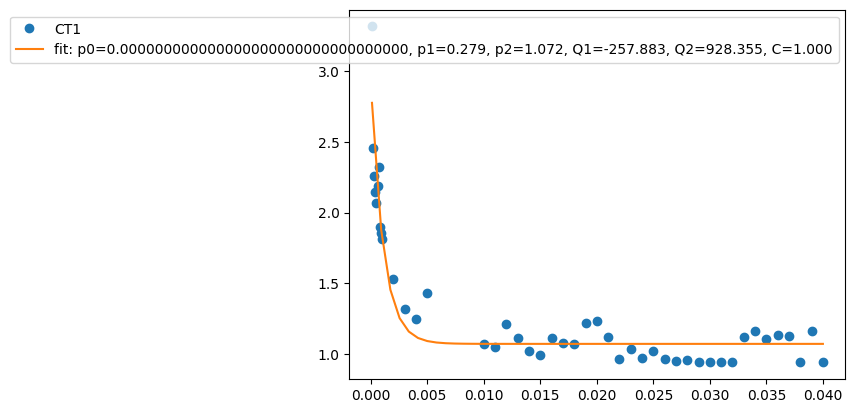

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


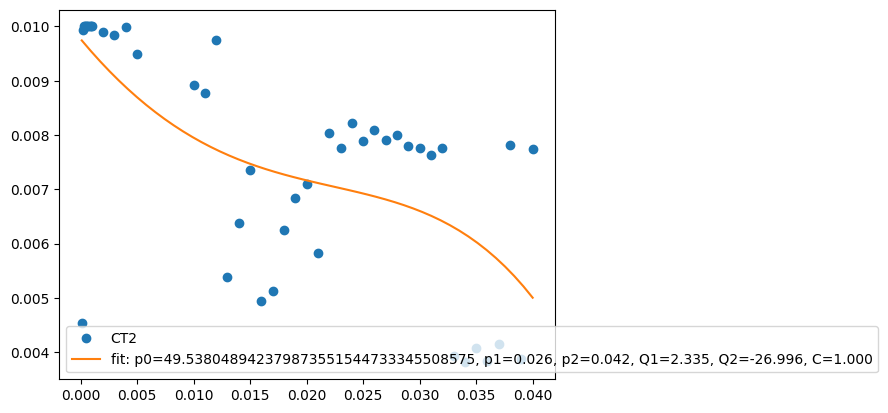

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:2: RuntimeWarning: invalid value encountered in power
  return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s))
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


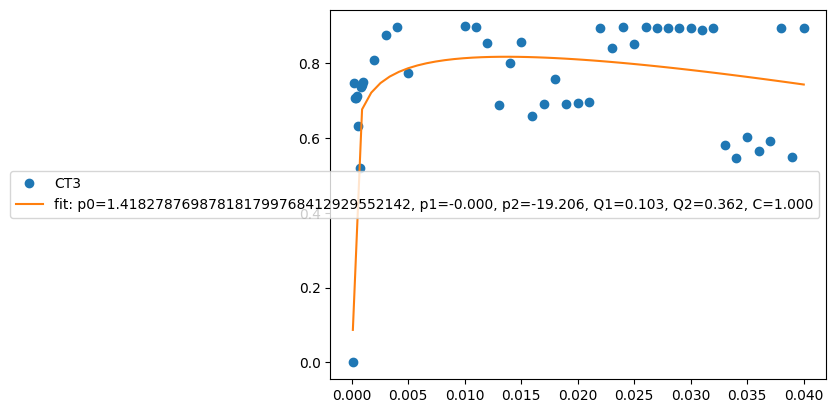

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:2: RuntimeWarning: overflow encountered in power
  return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s))
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


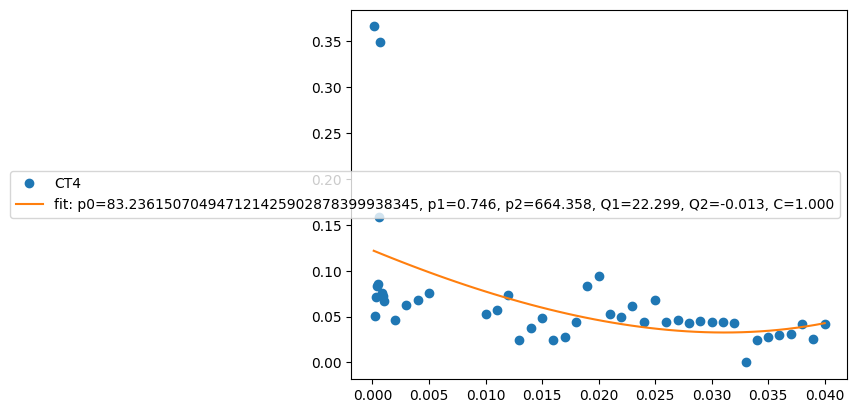

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:2: RuntimeWarning: overflow encountered in power
  return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s))
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


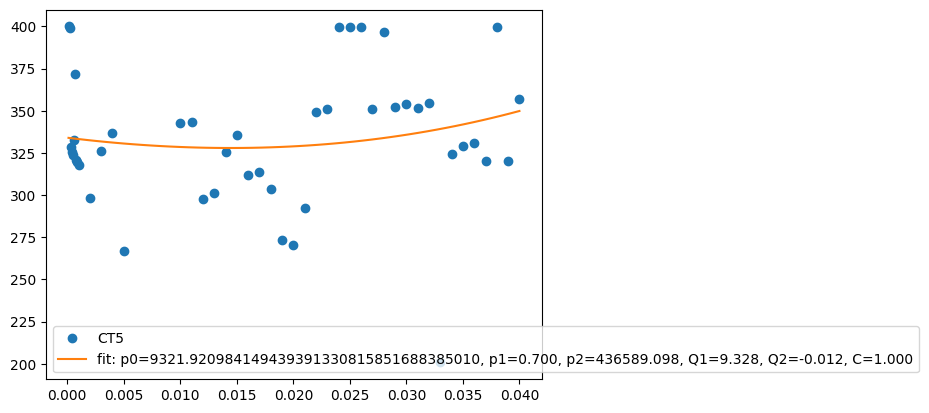

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:2: RuntimeWarning: invalid value encountered in power
  return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s))
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


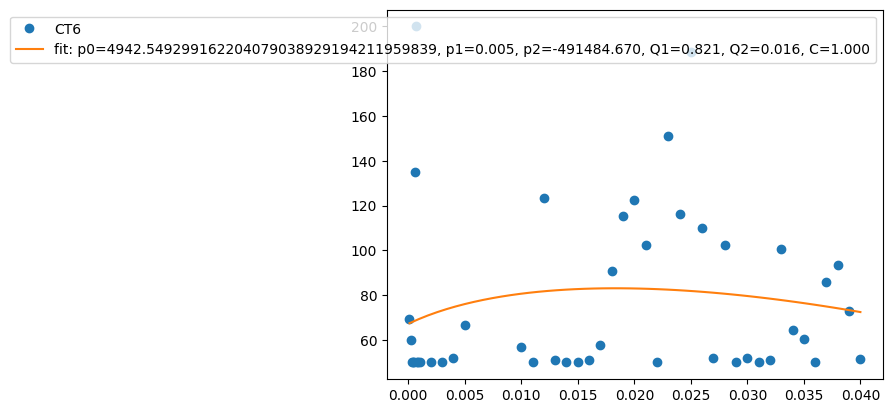

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:2: RuntimeWarning: overflow encountered in power
  return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s))
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


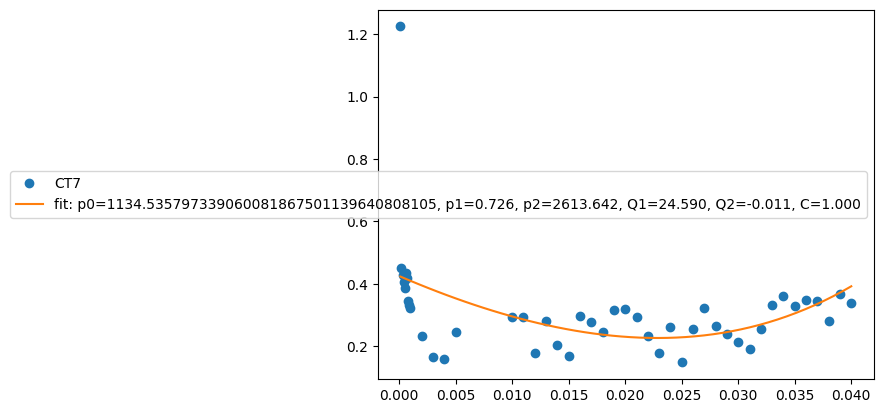

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:2: RuntimeWarning: overflow encountered in power
  return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s))
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


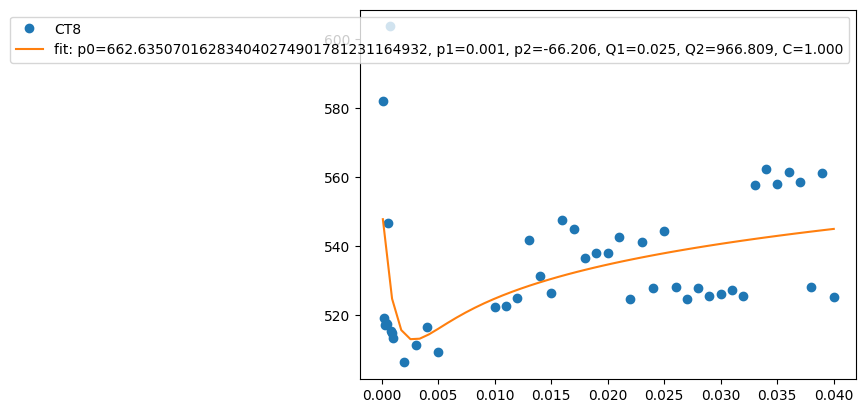

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:2: RuntimeWarning: overflow encountered in power
  return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s))
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3775325469.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)


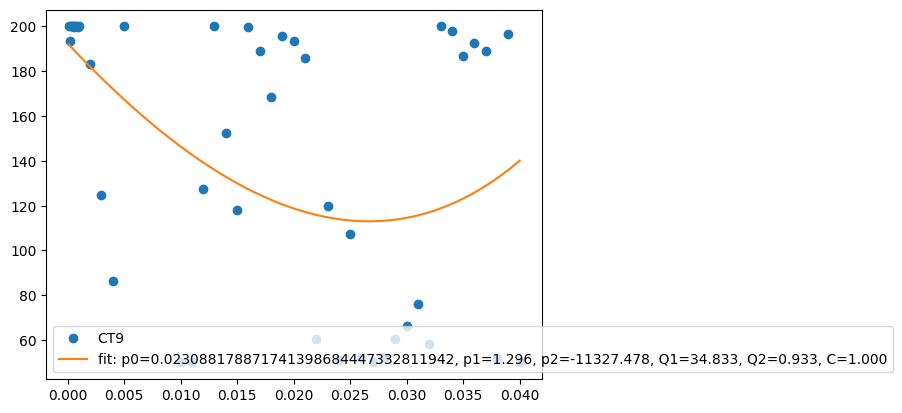

In [11]:
def cT1to4_func(s, p0, p1, p2, Q1, Q2, C): # Function (13) in Shen et al.
    return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s)) 

    # return -p0*s/(s**Q1+p1) + C + p2*(s**Q2)
def cT5_func(s, p0, p1, p2, Q1, Q2): # Same function ?
    return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s)) 

cT = {}


PEEQ= filtered_data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 50)

df_para_fit = pd.DataFrame(PEEQ_fit, columns=['PEEQ_fit'])

for j, i in enumerate(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])):
    if i != 0:
        cT_array = filtered_data["C{}".format(i)].to_numpy()
        params = curve_fit(cT1to4_func, PEEQ, cT_array, maxfev = 10000000)
        [p0, p1, p2, Q1, Q2, C] = params[0]
        cT["para{}".format(i)] = [p0, p1, p2, Q1, Q2, C]
        cT.update(cT)
        para_fit = cT1to4_func(PEEQ_fit, p0, p1, p2, Q1, Q2, C)
        df_para_fit['CT%d'% i] = para_fit
        plotObjects = plt.plot(PEEQ, cT_array, 'o', PEEQ_fit, para_fit)
        plt.legend(iter(plotObjects), ('CT%d'% i, 'fit: p0=%5.33f, p1=%5.3f, p2=%5.3f, Q1=%5.3f, Q2=%5.3f, C=%5.3f' %tuple(cT["para{}".format(i)])))
        plt.show()
    else:
        str(0)
    df_para_fit.to_csv('para_fit_results.csv', index=False)

In [12]:
stress_data = pd.read_csv("Fitted_FC_TmpDpn_RD_StrRt0.0001_ref.csv")
fitted_para = pd.read_csv("para_fit_results.csv")

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\3922487335.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}, C7 = {C7:.3f}, C8 = {C8:.3f}, C9 = {C9:.3f}'])


[2.33219773 1.26455856 1.         1.32765637 1.4637548  1.43116091
 1.16800752]


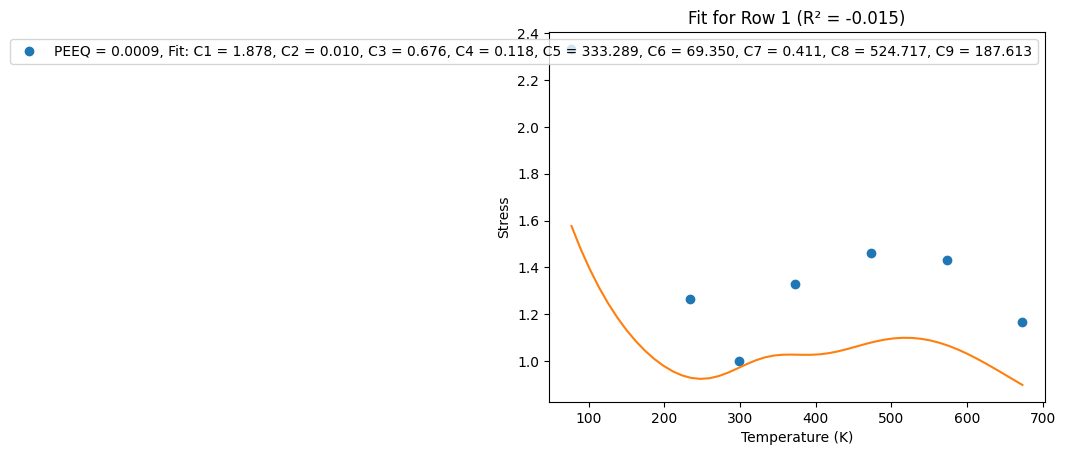

[1.88977535 1.04028073 1.         1.10573315 1.20809166 1.17370133
 0.99026645]


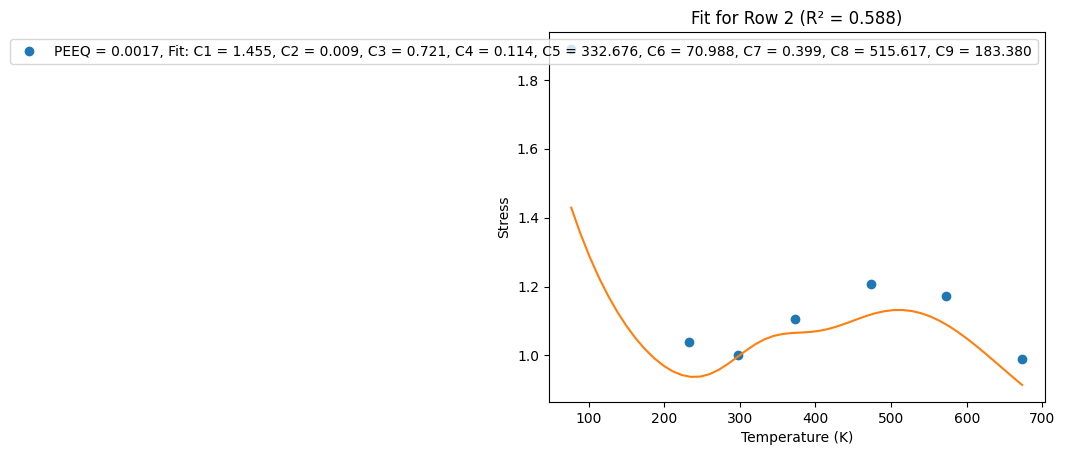

[1.75580815 0.98239076 1.         1.0486669  1.13967641 1.10277459
 0.94778786]


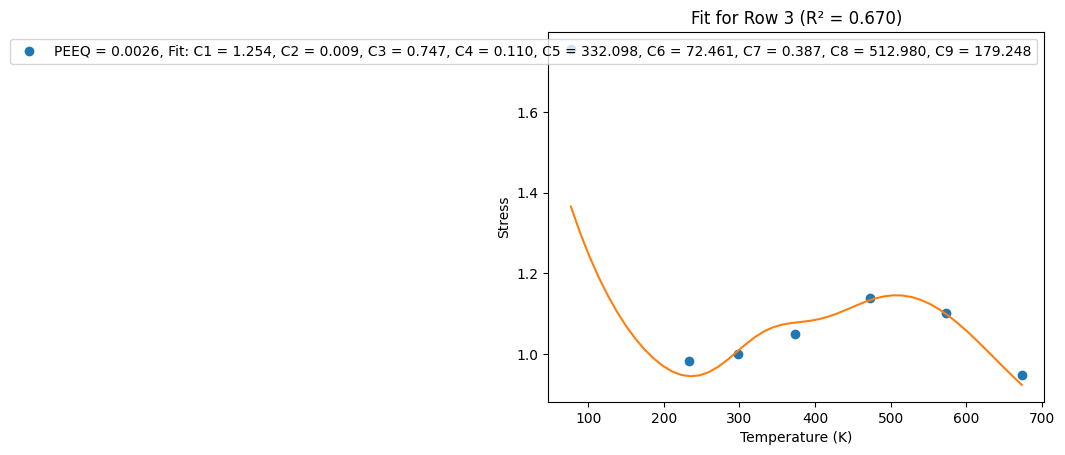

[1.70260576 0.96735308 1.         1.03210659 1.11772935 1.07936231
 0.93761111]


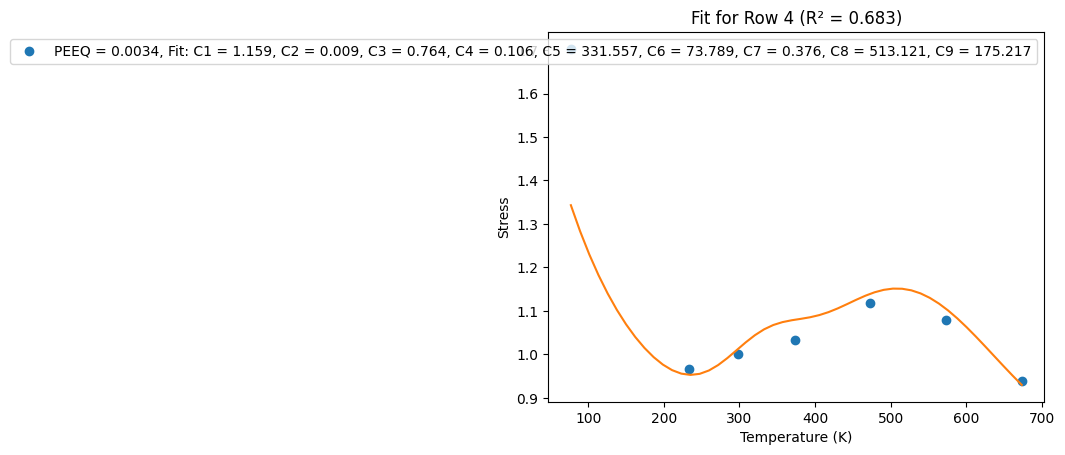

[1.67202446 0.9636772  1.         1.02517726 1.1071245  1.06828681
 0.93438411]


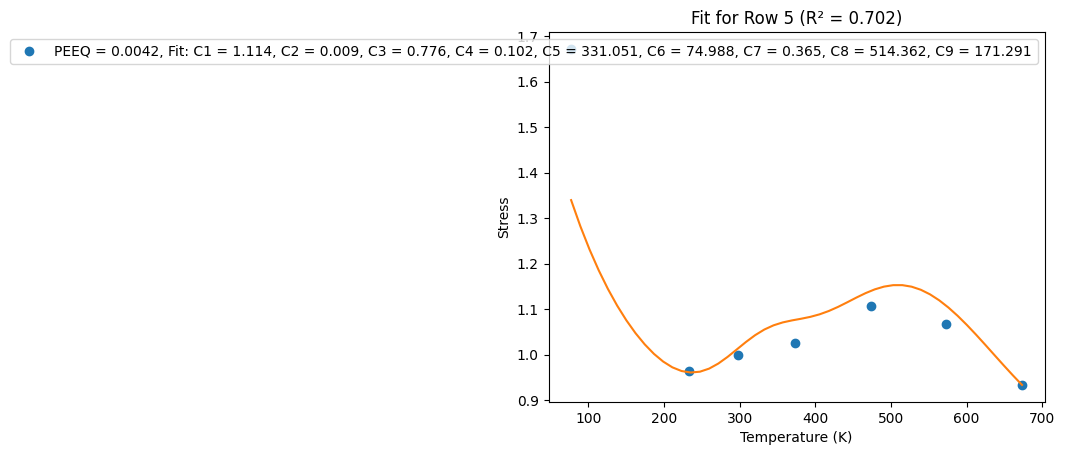

[1.64977962 0.96358756 1.         1.0207674  1.09970582 1.06107194
 0.93250779]


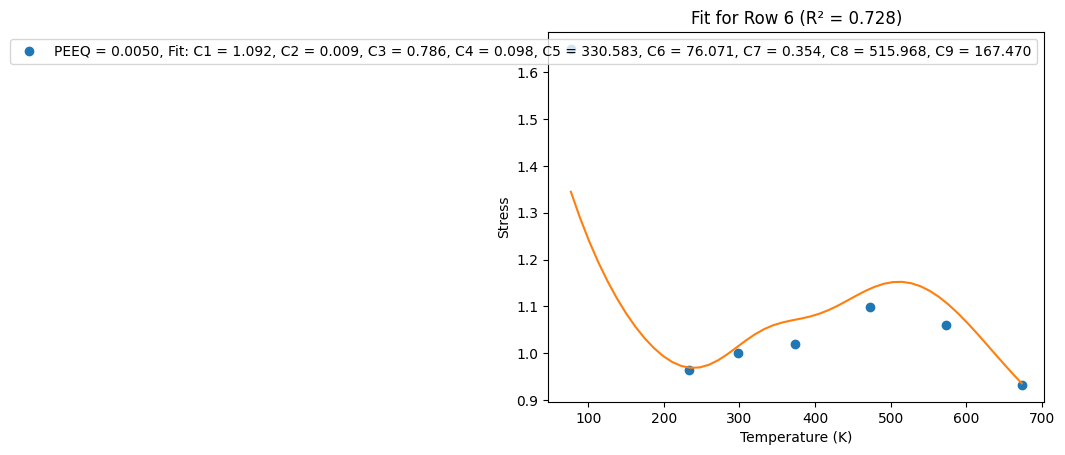

[1.59135519 0.97146423 1.         1.00816312 1.07818814 1.04261654
 0.92557132]


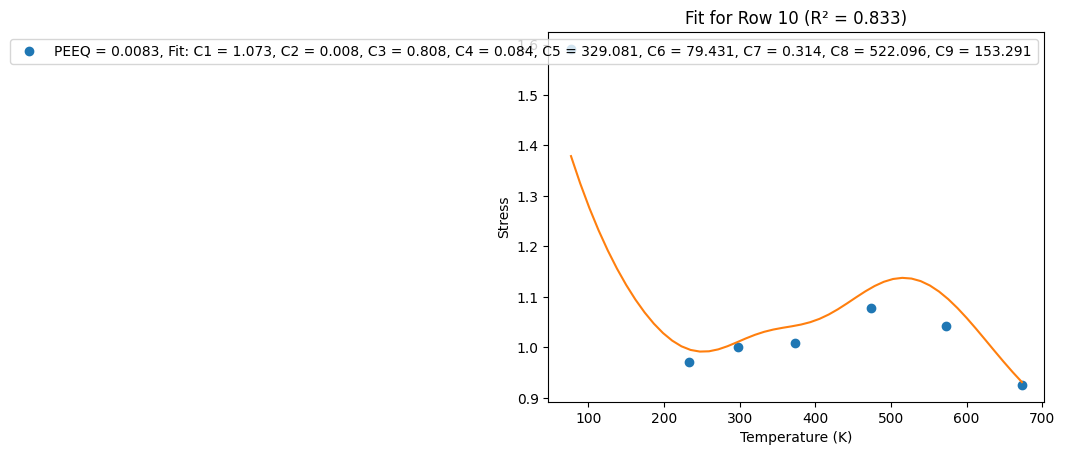

[1.52308237 0.99512694 1.         0.99046308 1.05028236 1.0195775
 0.91318337]


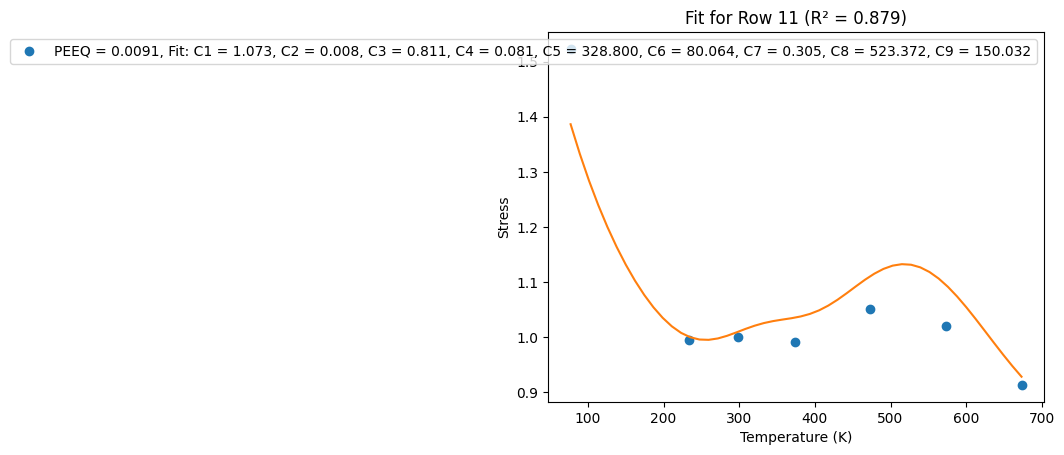

[1.46346827 1.02506208 1.         0.97694684 1.02940085 1.00337592
 0.90251418]


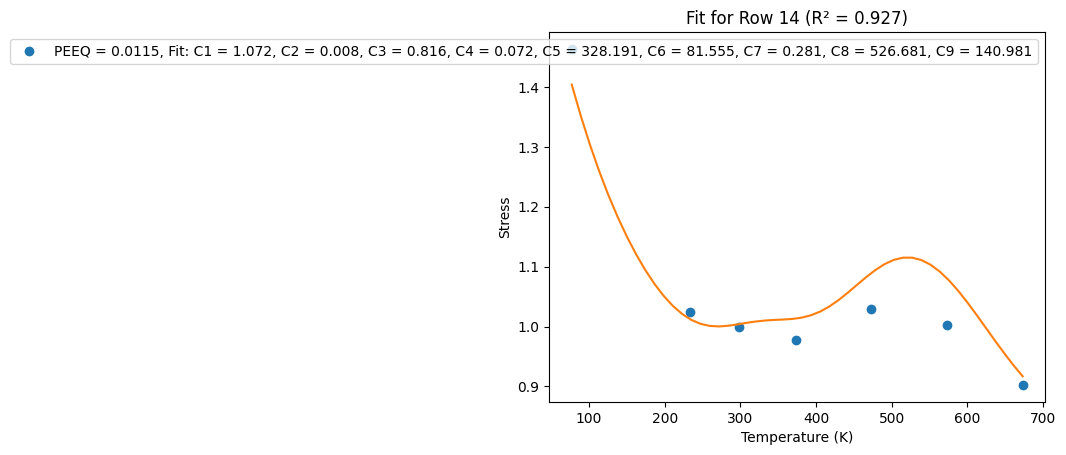

[1.43427297 1.03294434 1.         0.97719854 1.02511894 1.00856621
 0.90042063]


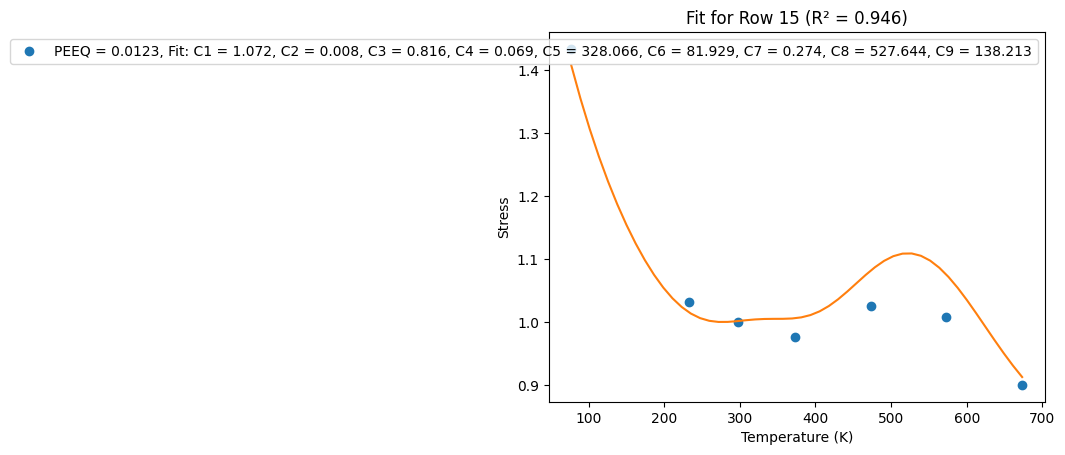

[1.42108056 1.03699166 1.         0.979791   1.02588198 1.01656784
 0.89993155]


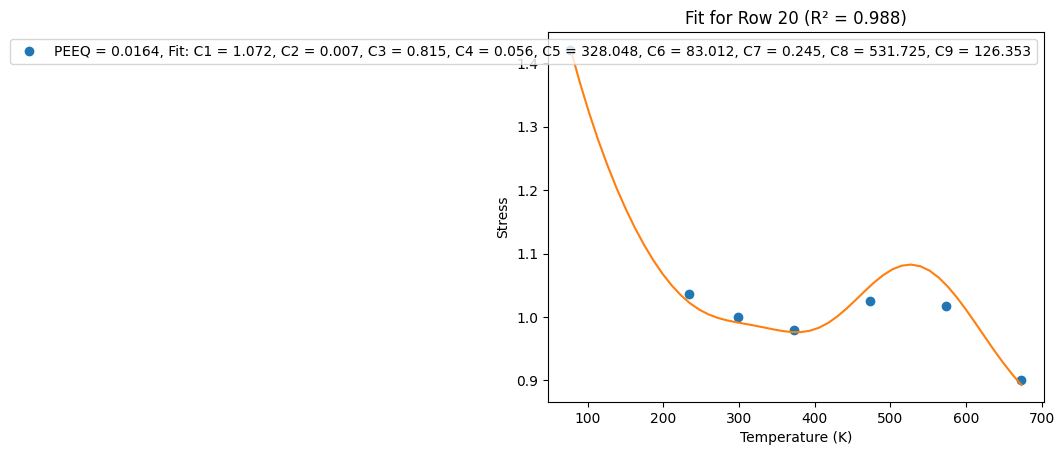

[1.41455959 1.04130102 1.         0.98175445 1.02752097 1.02333539
 0.89958156]


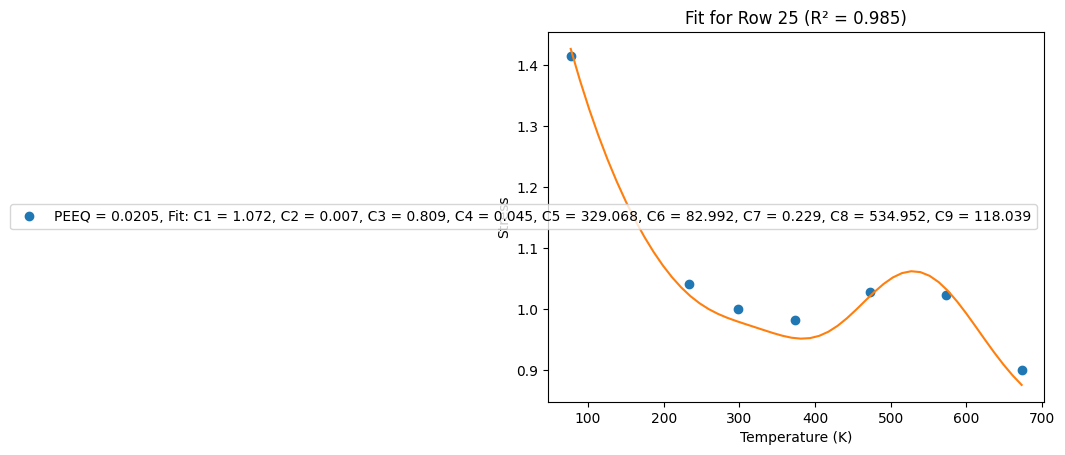

[1.41173245 1.04492866 1.         0.98310133 1.029308   1.02899767
 0.89941865]


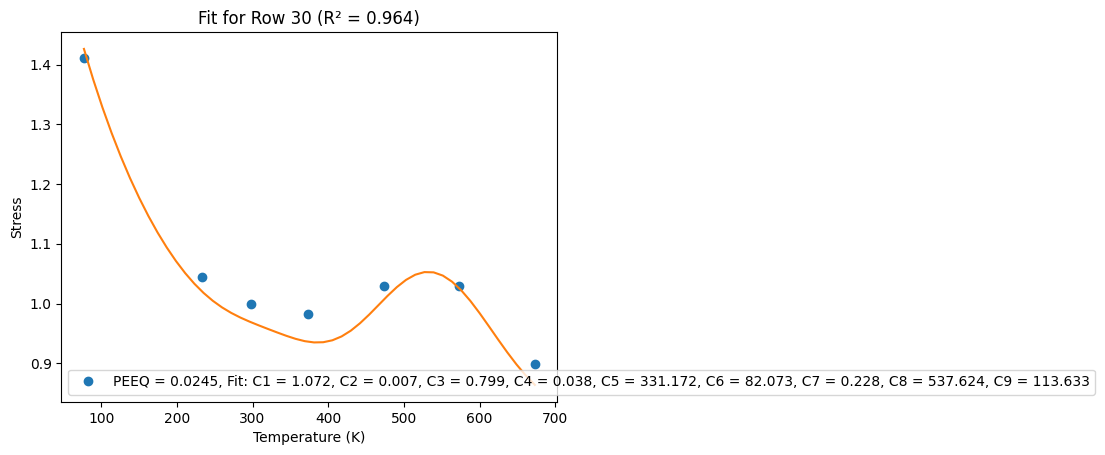

[1.4110547  1.04750822 1.         0.98407646 1.03105633 1.03384807
 0.89946539]


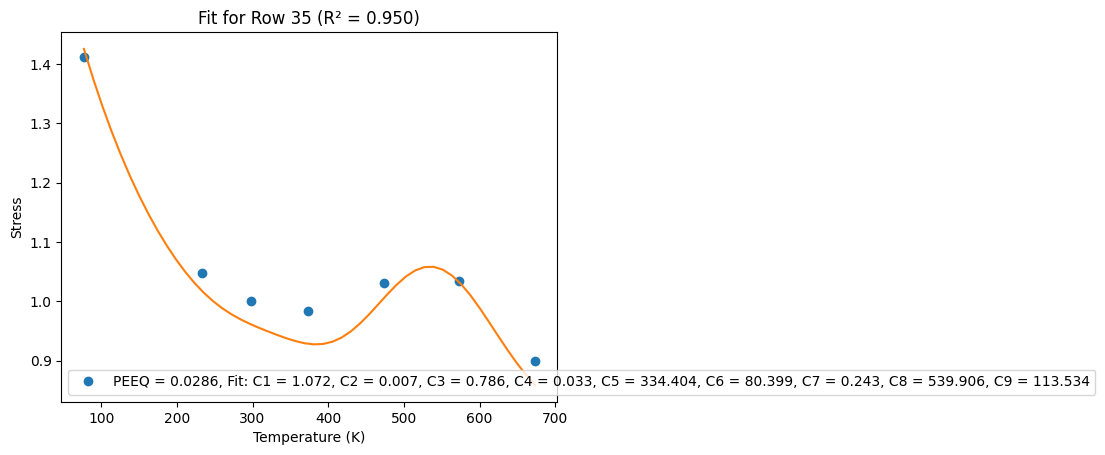

[1.4116733  1.04911386 1.         0.98485877 1.03271389 1.03809102
 0.89969087]


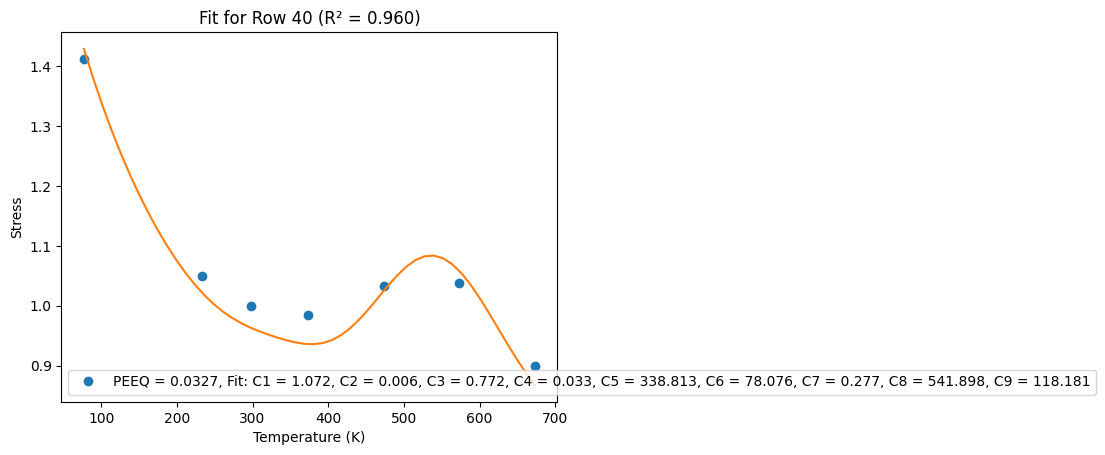

[1.41276708 1.04983602 1.         0.98541751 1.03396677 1.04114183
 0.89996998]


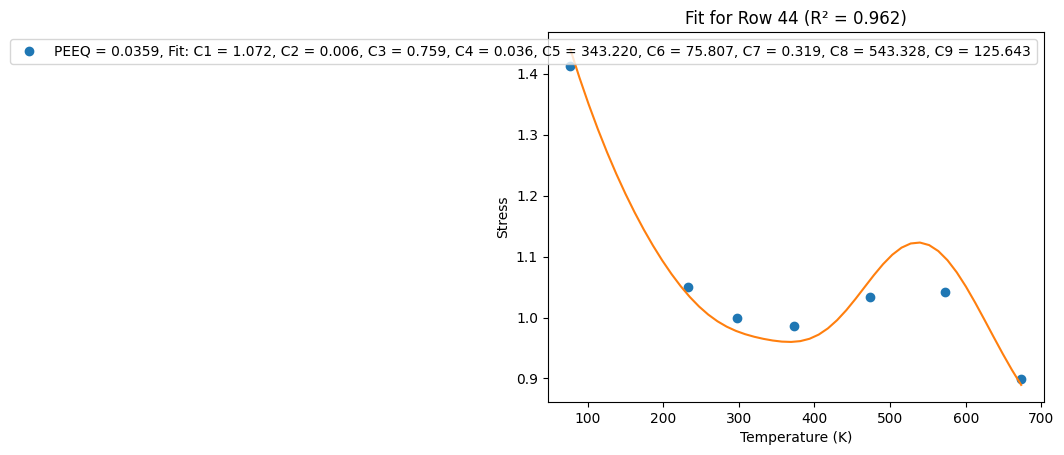

In [13]:
# Temperature data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Define the function with two Gaussians
def double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9):
    return (C1 * np.exp(-C2 * T) + C3 +
            C4 * np.exp(-((T - C5) / C6)**2) +
            C7 * np.exp(-((T - C8) / C9)**2))

for j, i in enumerate(np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,44])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6, C7, C8, C9] = fitted_para.iloc[i, 1:].to_numpy()
    stress = stress_data.iloc[i, 8:].values
    print(stress)
    gaussian_fit = double_gaussian_func(T_fit, C1, C2, C3, C4, C5, C6, C7, C8, C9)

    # Calculate residuals for error estimation
    residuals = stress - double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((stress - np.mean(stress))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, stress, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}, C7 = {C7:.3f}, C8 = {C8:.3f}, C9 = {C9:.3f}'])
    plt.show()
    
else:
    str(0)
    

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


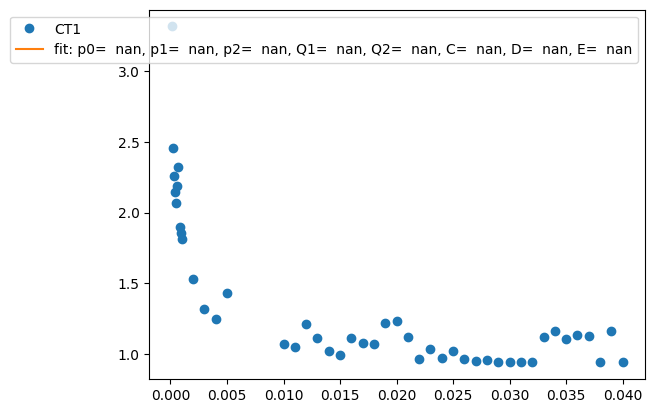

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


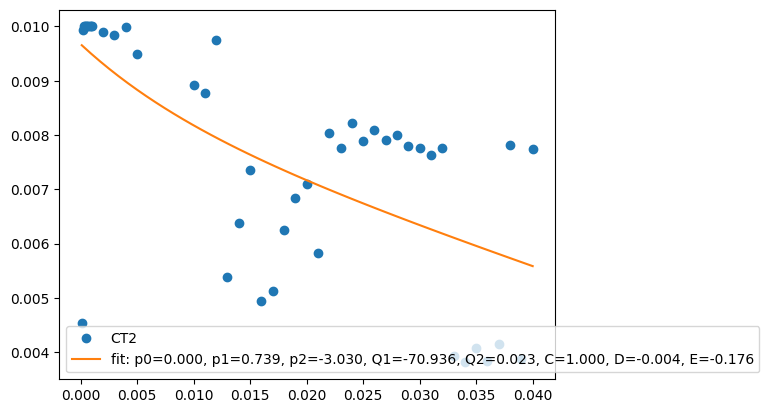

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


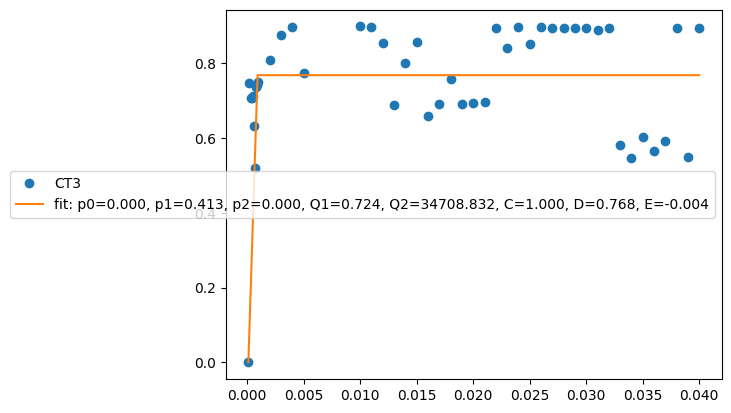

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


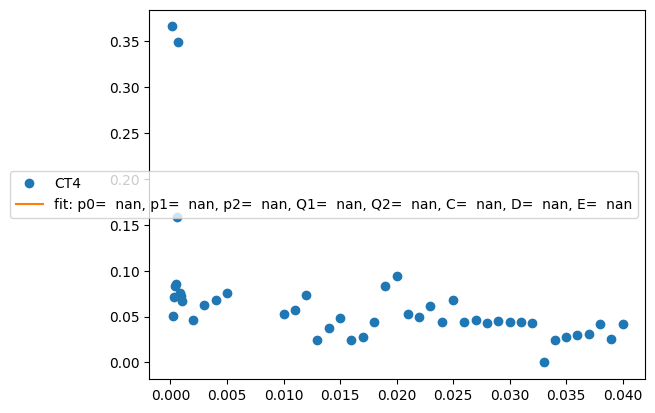

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:3: RuntimeWarning: overflow encountered in power
  power_term = p0 * (s + p1)**Q1
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


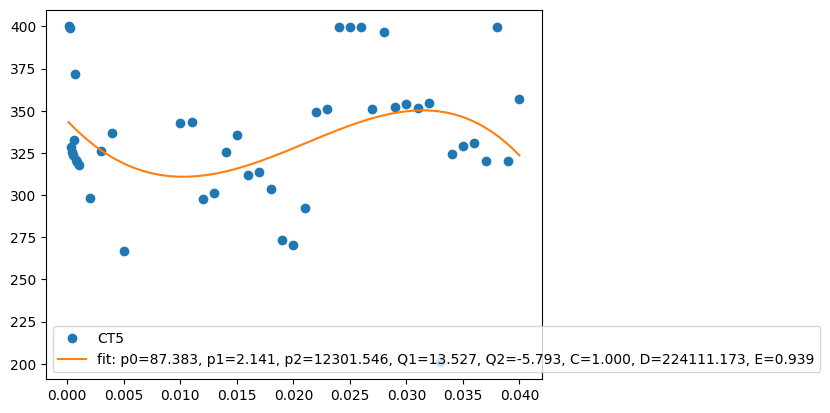

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


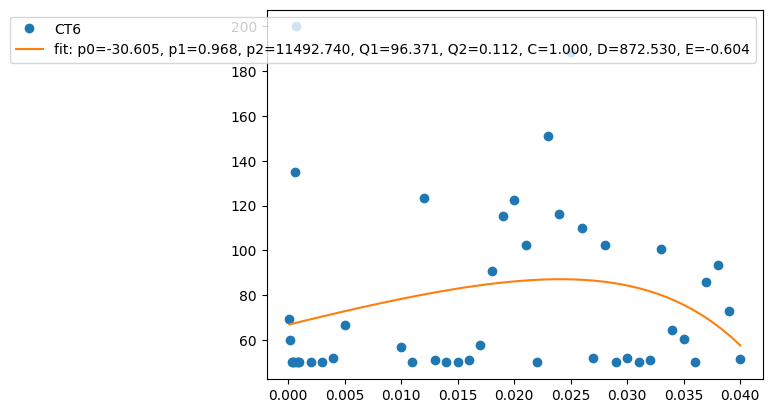

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


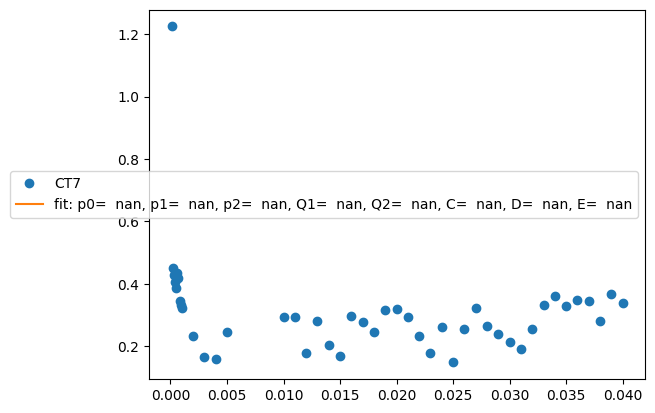

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:3: RuntimeWarning: overflow encountered in power
  power_term = p0 * (s + p1)**Q1
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


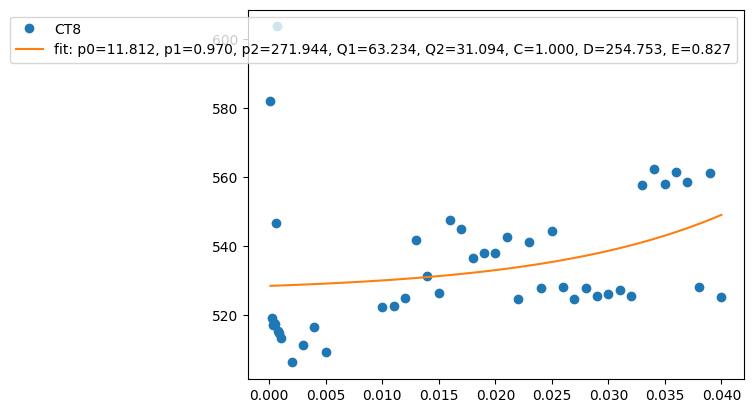

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:3: RuntimeWarning: overflow encountered in power
  power_term = p0 * (s + p1)**Q1
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:4: RuntimeWarning: overflow encountered in exp
  exponential_term = p2 * (1 - np.exp(-Q2 * (s + E)))
C:\Users\meian\AppData\Local\Temp\ipykernel_37600\2683208859.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)


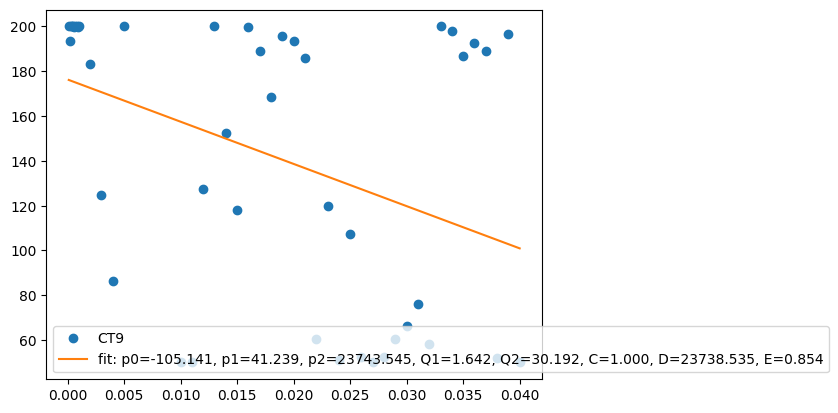

In [14]:
def cT1to4_func(s, p0, p1, p2, Q1, Q2, C, D, E):
    # Adding an offset term 'D' and a new modulating coefficient 'E' for the exponential term
    power_term = p0 * (s + p1)**Q1
    exponential_term = p2 * (1 - np.exp(-Q2 * (s + E)))
    return power_term + exponential_term + D

# Sample implementation assuming PEEQ and cT_array are defined
initial_guesses = [1, 1, 1, 1, 1, 1, 0, 0]  # Add initial guesses for D and E

df_para_fit = pd.DataFrame(PEEQ_fit, columns=['PEEQ_fit'])


for j, i in enumerate(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])):
    cT_array = filtered_data["C{}".format(i)].to_numpy()
    params, cov = curve_fit(cT1to4_func, PEEQ, cT_array, p0=initial_guesses, maxfev=10000000)
    p0, p1, p2, Q1, Q2, C, D, E = params
    cT["para{}".format(i)] = [p0, p1, p2, Q1, Q2, C, D, E]
    para_fit = cT1to4_func(PEEQ_fit, *params)
    df_para_fit['CT%d' % i] = para_fit
    plt.plot(PEEQ, cT_array, 'o', label='CT%d' % i)
    plt.plot(PEEQ_fit, para_fit, '-', label='fit: p0=%5.3f, p1=%5.3f, p2=%5.3f, Q1=%5.3f, Q2=%5.3f, C=%5.3f, D=%5.3f, E=%5.3f' % tuple(cT["para{}".format(i)]))
    plt.legend()
    plt.show()

df_para_fit.to_csv('para_fit_results_mod.csv', index=False)

In [15]:
fitted_para = pd.read_csv("para_fit_results_mod.csv")

C:\Users\meian\AppData\Local\Temp\ipykernel_37600\4263120752.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}, C7 = {C7:.3f}, C8 = {C8:.3f}, C9 = {C9:.3f}'])


[2.33219773 1.26455856 1.         1.32765637 1.4637548  1.43116091
 1.16800752]


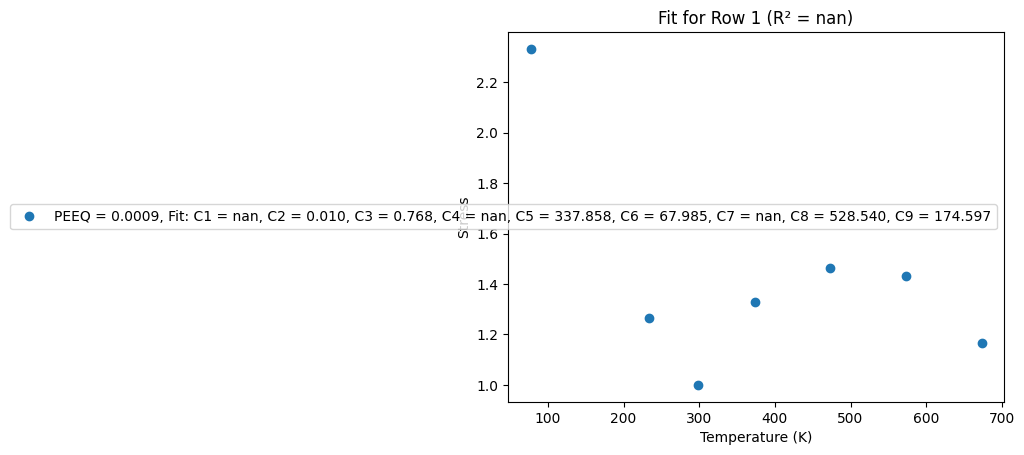

[1.88977535 1.04028073 1.         1.10573315 1.20809166 1.17370133
 0.99026645]


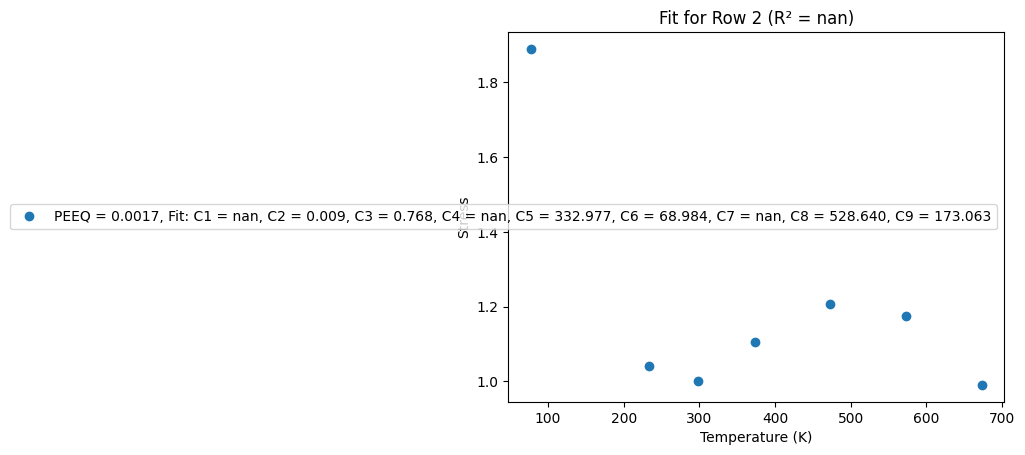

[1.75580815 0.98239076 1.         1.0486669  1.13967641 1.10277459
 0.94778786]


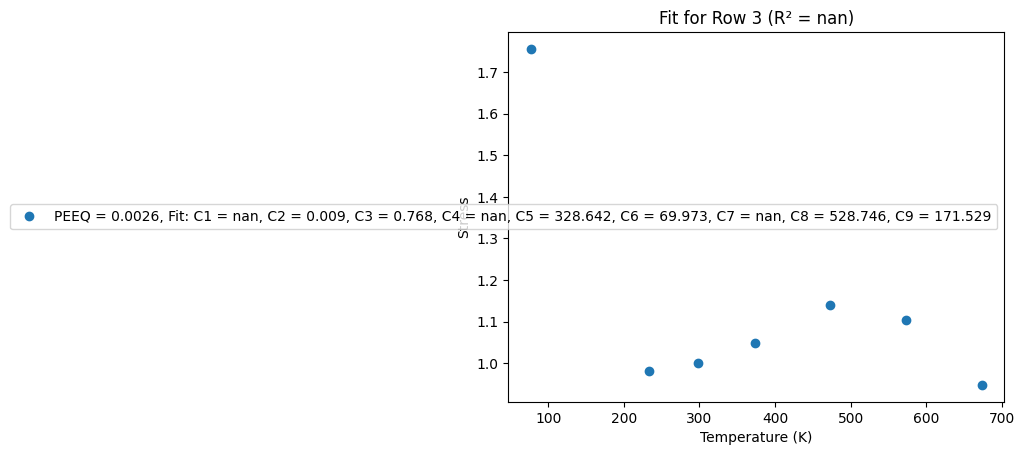

[1.70260576 0.96735308 1.         1.03210659 1.11772935 1.07936231
 0.93761111]


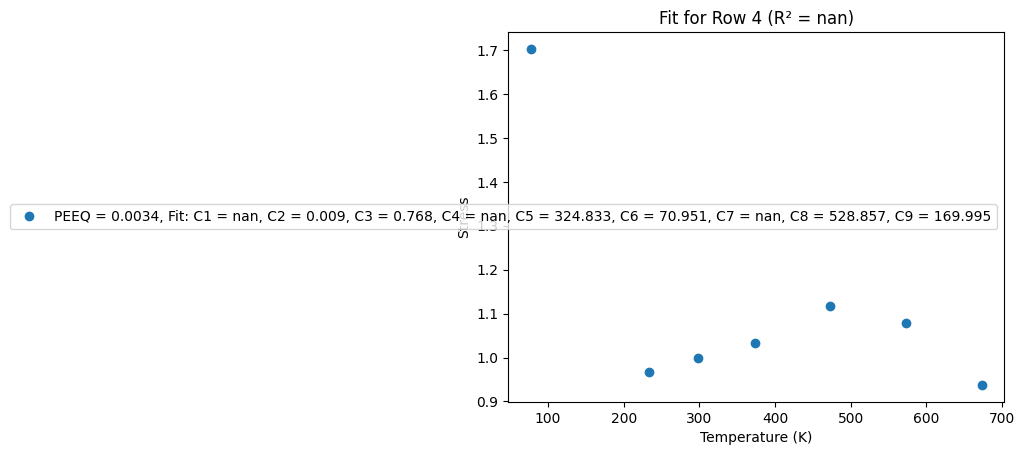

[1.67202446 0.9636772  1.         1.02517726 1.1071245  1.06828681
 0.93438411]


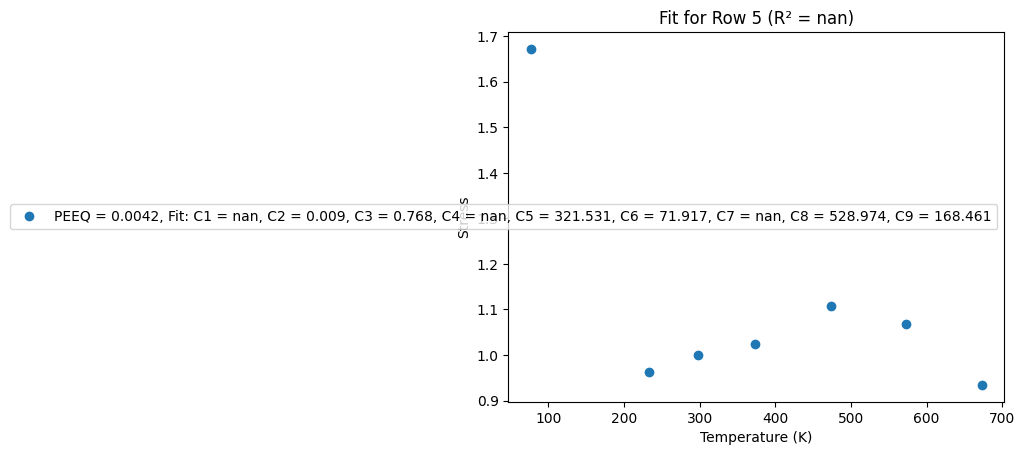

[1.64977962 0.96358756 1.         1.0207674  1.09970582 1.06107194
 0.93250779]


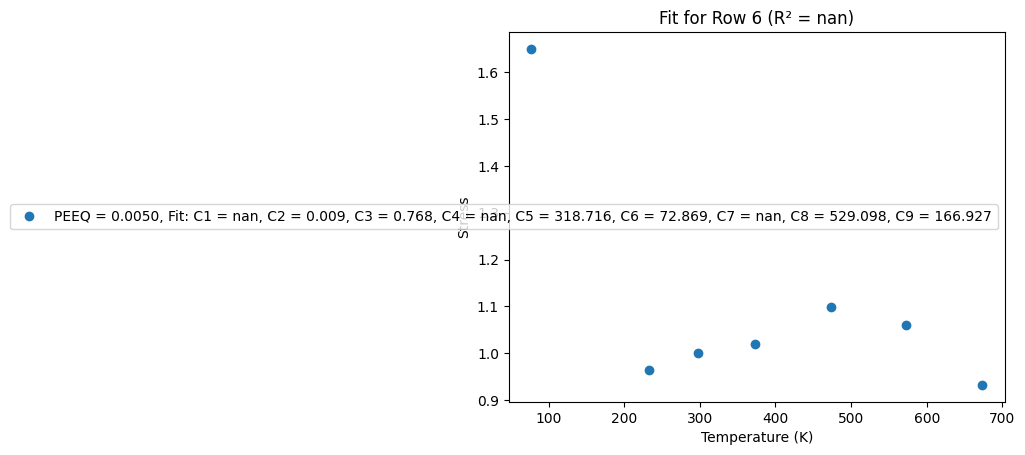

[1.59135519 0.97146423 1.         1.00816312 1.07818814 1.04261654
 0.92557132]


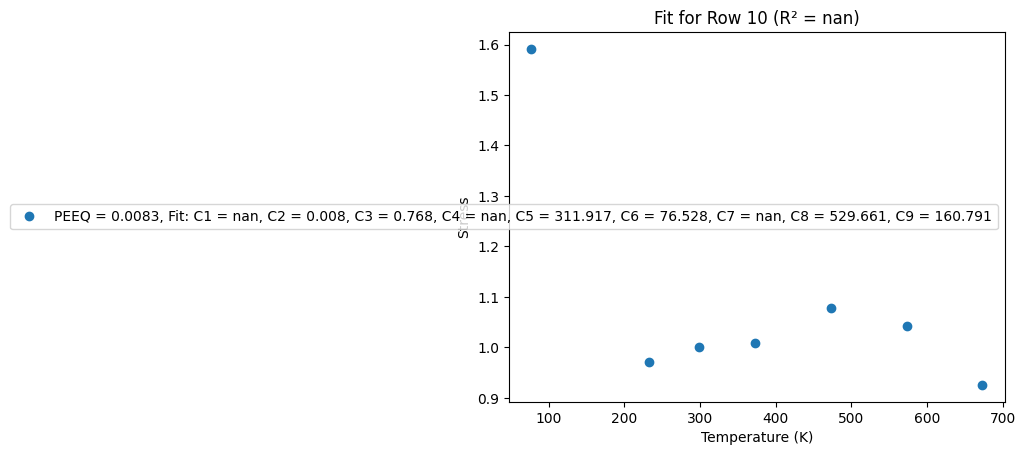

[1.52308237 0.99512694 1.         0.99046308 1.05028236 1.0195775
 0.91318337]


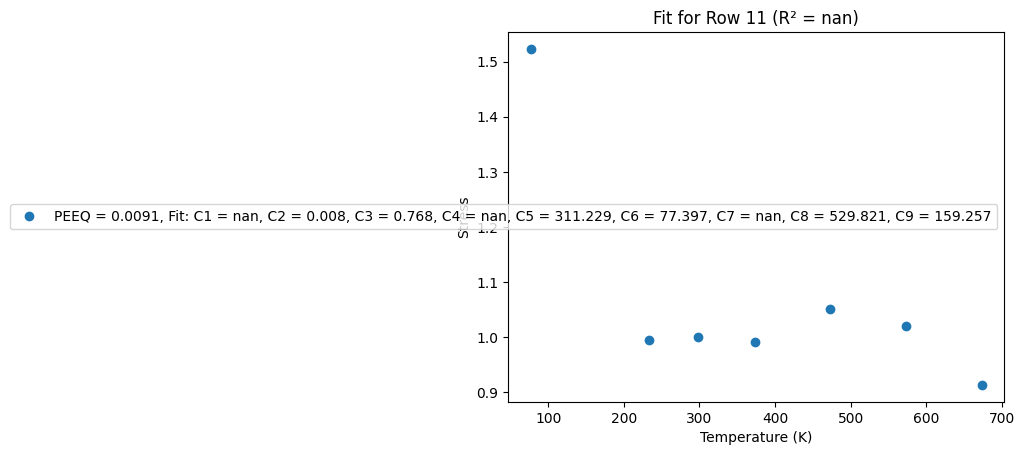

[1.46346827 1.02506208 1.         0.97694684 1.02940085 1.00337592
 0.90251418]


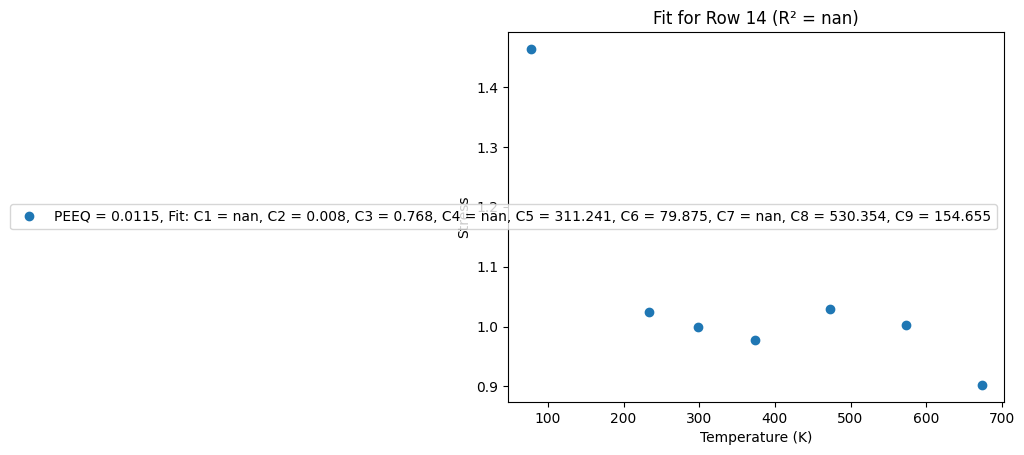

[1.43427297 1.03294434 1.         0.97719854 1.02511894 1.00856621
 0.90042063]


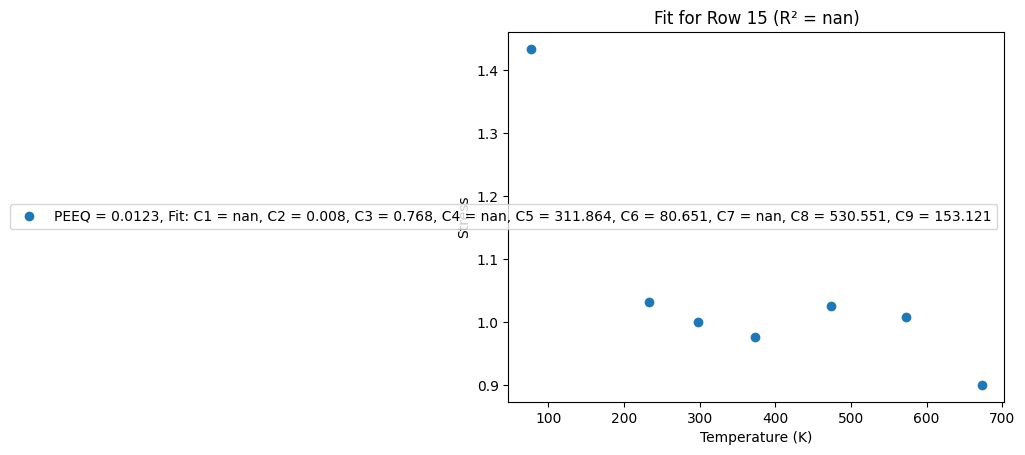

[1.42108056 1.03699166 1.         0.979791   1.02588198 1.01656784
 0.89993155]


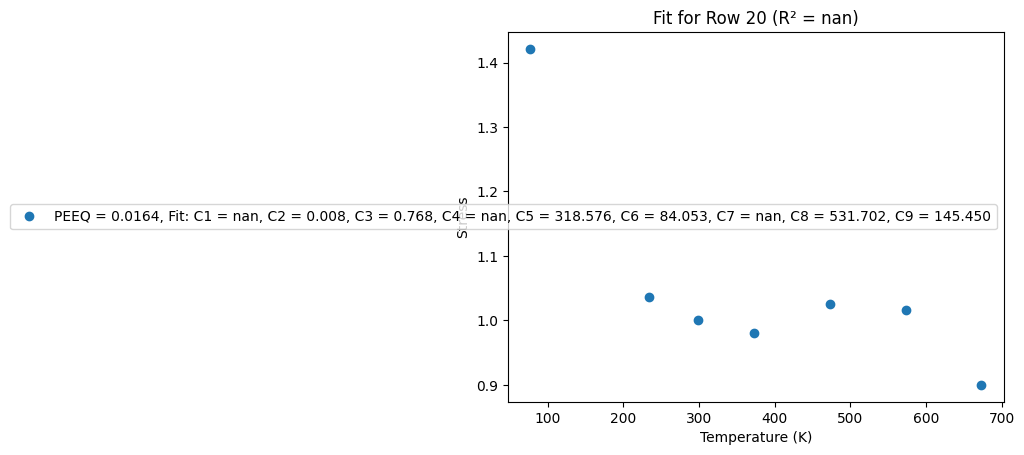

[1.41455959 1.04130102 1.         0.98175445 1.02752097 1.02333539
 0.89958156]


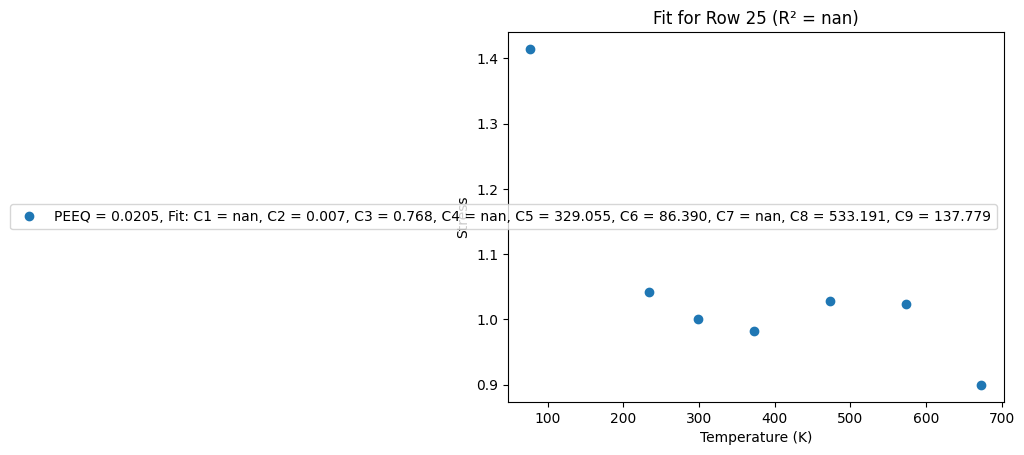

[1.41173245 1.04492866 1.         0.98310133 1.029308   1.02899767
 0.89941865]


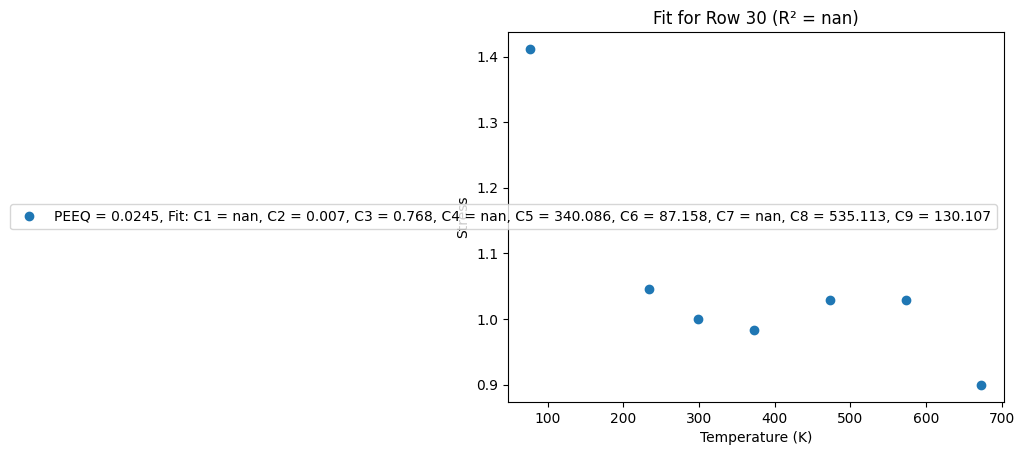

[1.4110547  1.04750822 1.         0.98407646 1.03105633 1.03384807
 0.89946539]


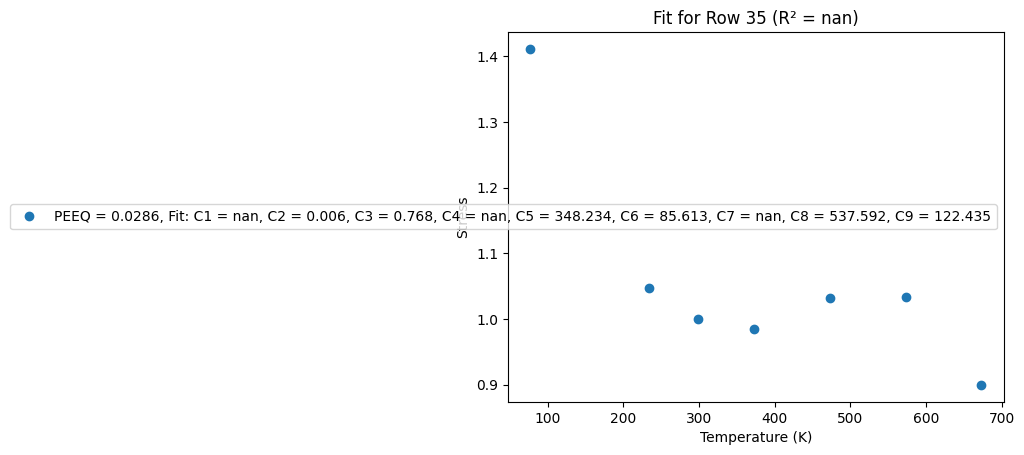

[1.4116733  1.04911386 1.         0.98485877 1.03271389 1.03809102
 0.89969087]


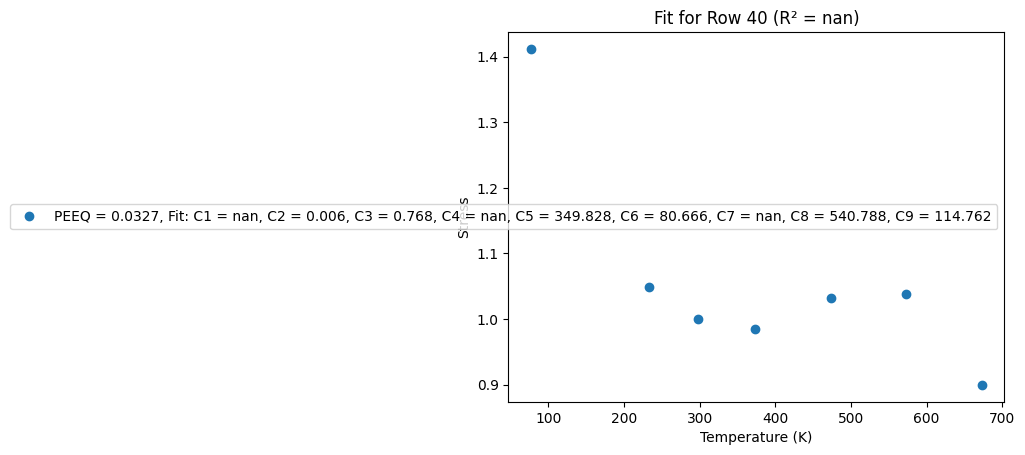

[1.41276708 1.04983602 1.         0.98541751 1.03396677 1.04114183
 0.89996998]


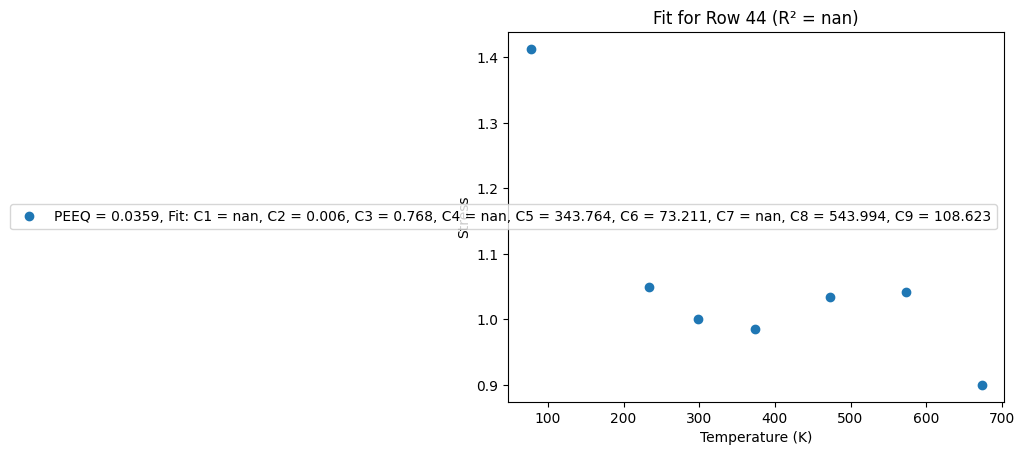

In [16]:
# Temperature data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Define the function with two Gaussians
def double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9):
    return (C1 * np.exp(-C2 * T) + C3 +
            C4 * np.exp(-((T - C5) / C6)**2) +
            C7 * np.exp(-((T - C8) / C9)**2))

for j, i in enumerate(np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,44])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6, C7, C8, C9] = fitted_para.iloc[i, 1:].to_numpy()
    stress = stress_data.iloc[i, 8:].values
    print(stress)
    gaussian_fit = double_gaussian_func(T_fit, C1, C2, C3, C4, C5, C6, C7, C8, C9)

    # Calculate residuals for error estimation
    residuals = stress - double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((stress - np.mean(stress))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, stress, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}, C7 = {C7:.3f}, C8 = {C8:.3f}, C9 = {C9:.3f}'])
    plt.show()
    
else:
    str(0)
   